**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 27. Multiple Logistic Regression &ndash; Part 2 

## Overview

In this lesson, we will continue to use the `MedGPA` data, which contains information for 55 medical school applicants from a liberal arts college in the Midwest.

In [1]:
library(Stat2Data)
data(MedGPA)
head(MedGPA)

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


We will focus on the following variables:

| Variable | Description |
| :- | :- | 
| `GPA` | Applicant's college grade point average |
| `MCAT` | Applicant's MCAT (Medical College Admission Test) score |
| `Sex` | F for female, M for male |
| `Acceptance` | 1 if accepted, 0 if not accepted |

Unless otherwise stated, use a significance level of $\alpha = 0.05$.
Throughout this lesson, let $\pi = P(\mathit{Acceptance} = 1)$.

## Example 1

__Does probability of acceptance differ by sex?__

### a.

Fit a model that uses sex to predict acceptance.

In [2]:
# Solution
fit <- glm(Acceptance ~ Sex, data = MedGPA, family = binomial)
summary(fit)


Call:
glm(formula = Acceptance ~ Sex, family = binomial, data = MedGPA)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.5878     0.3944   1.490    0.136
SexM         -0.8109     0.5528  -1.467    0.142

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 73.594  on 53  degrees of freedom
AIC: 77.594

Number of Fisher Scoring iterations: 4


* Note that `Sex` is a categorical variable with two "levels" (categories) 

* We can confirm this by using the `level()` function on the `Sex` variable, like this:

In [3]:
levels(MedGPA$Sex)

[1] "F" "M"

* For categorical variables, R uses the first category as the reference category, and automatically creates a binary variable for every other level

* In this case, R uses 'F' as the reference category, and defines the variable

    $$ \mathit{SexM} = \begin{cases}
    1 & \text{if $\mathit{Sex}$ = M}\\
    0 & \text{otherwise}
    \end{cases}$$

* You should find that the fitted model is

    $$ \text{logit}(\hat{\pi}) = 0.5878 - 0.8109 \mathit{SexM} $$

### b.

Interpret the estimated slope of $\mathit{SexM}$, in terms of an odds ratio.

In [4]:
# Solution
exp(-0.8109)

[1] 0.4444579

*Write your answer here. Double-click to edit.*

*Solution.*
The odds of acceptance for male students are $e^{-0.8109} = 0.4444$ times as high as for female students.

### c.

Provide a 95\% confidence interval for the true odds ratio of acceptance between male and female students.

In [5]:
# Solution
alpha <- 0.05
z <- qnorm(1 - alpha / 2, mean = 0, sd = 1)

slope.ci.lower <- -0.8109 - z * 0.5528
slope.ci.upper <- -0.8109 + z * 0.5528

or.ci.lower <- exp(slope.ci.lower)
or.ci.upper <- exp(slope.ci.upper)

or.ci.lower
or.ci.upper

[1] 0.1504134

[1] 1.313333

### d.

Is there significant evidence that the probability of acceptance differs by sex? Justify your answer.

*Write your answer here. Double-click to edit.*

*Solution*.
The $z$-test for the slope of $\mathit{SexM}$ results in a $p$-value of 0.142, which is greater than $\alpha$.
Therefore, we fail to reject the null hypothesis.
We conclude that we do **not** have significant evidence that the probability of acceptance differs by sex. 

## Example 2

__After accounting for GPA, does probability of acceptance differ by sex?__

### a.

Fit a model that uses GPA and sex to predict acceptance. 

In [6]:
# Solution
fit <- glm(Acceptance ~ GPA + Sex, data = MedGPA, family = binomial)
summary(fit)


Call:
glm(formula = Acceptance ~ GPA + Sex, family = binomial, data = MedGPA)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.0680     6.4025  -3.291 0.001000 ***
GPA           6.1324     1.8283   3.354 0.000796 ***
SexM         -1.1697     0.7178  -1.629 0.103210    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.945  on 52  degrees of freedom
AIC: 59.945

Number of Fisher Scoring iterations: 5


* You should find the fitted model is

    $$ \text{logit}(\hat{\pi}) = -21.0680 + 6.1324 \mathit{GPA} - 1.1697 \mathit{SexM} $$

* Therefore, for male students, the model is
    \begin{align*}
    \text{logit}(\hat{\pi}) & = -21.0680 + 6.1324 \mathit{GPA} - 1.1697 (1)\\
    & = -22.2377 + 6.1324 \mathit{GPA}
    \end{align*}
    and for female students,
    \begin{align*}
    \text{logit}(\hat{\pi}) & = -21.0680 + 6.1324 \mathit{GPA} - 1.1697 (0)\\
    & = -21.0680 + 6.1324 \mathit{GPA}
    \end{align*}

### b.

Compare the fitted model (in probability form) for male students with the fitted model for female students.

In particular, for each fitted model, compute where the midpoint occurs and the slope of the curve at that midpoint. 
Based on your answers, describe how the plots of the two fitted models compare to each other.

*Hint.* See Lesson 24.

*Write your answer here. Double-click to edit.*

In [7]:
# Solution
males.midpoint <- 22.2377 / 6.1324
males.slope <- 6.1324 / 4

females.midpoint <- 21.0680 / 6.1324
females.slope <- 6.1324 / 4

males.midpoint
males.slope

females.midpoint
females.slope

[1] 3.626264

[1] 1.5331

[1] 3.435523

[1] 1.5331

*Solution.*
The fitted model for male students and the fitted model for female students both have the same positive slope. However, the midpoint of the fitted model for male students is to the right of the midpoint of the fitted model for female students. This indicates that the curve of the fitted model for male students is to the right of the curve of the fitted model for female students. 

* Use the code below to plot the fitted models (in probability form) for male students and female students and confirm your answer to part b

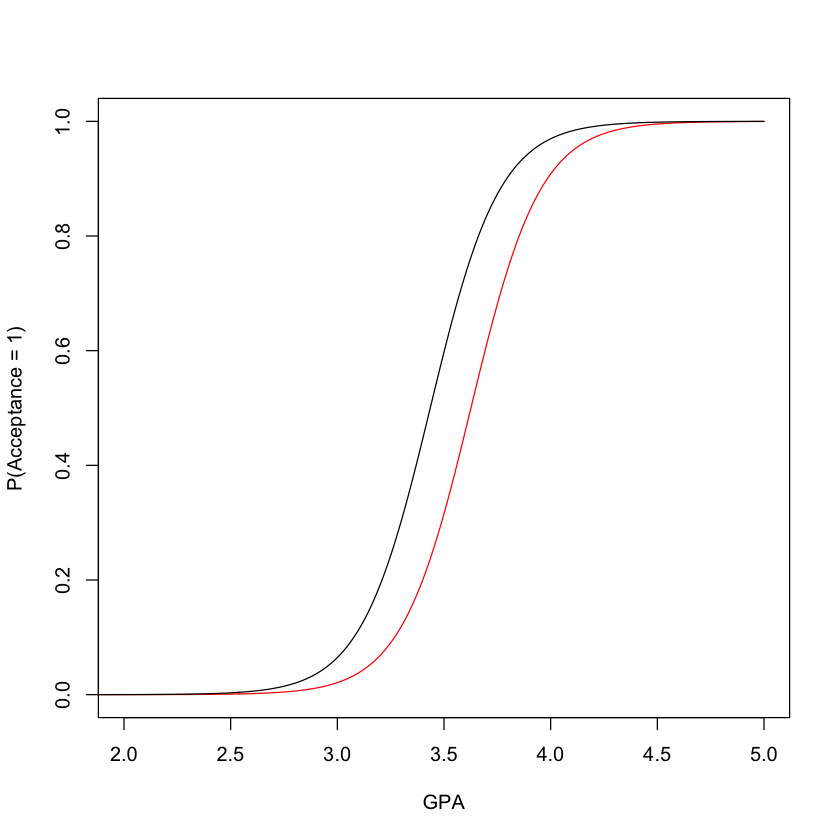

In [8]:
# Create x values for plots of fitted models
xx <- seq(from = 0.0, to = 5.0, by = 0.01)  

# Create y values for fitted model for male students
male.yy <- predict(fit, newdata = data.frame(GPA = xx, Sex = 'M'), type = 'response')

# Create y values for fitted model for female students
female.yy <- predict(fit, newdata = data.frame(GPA = xx, Sex = 'F'), type = 'response')

# Create plots of fitted models, starting with an empty plot as a starting point
plot(NULL, xlim = c(2, 5), ylim = c(0, 1), xlab = 'GPA', ylab = 'P(Acceptance = 1)')
lines(xx, male.yy, col = 'red')
lines(xx, female.yy, col = 'black')

### c.

Is the model useful overall? Conduct an appropriate test to decide.

In [9]:
# Solution
G <- 75.791 - 53.945
p.value <- 1 - pchisq(G, df = 2)

G
p.value

[1] 21.846

[1] 1.803854e-05

*Write your answer here. Double-click to edit.*

*Solution.* 

LRT for model utility:

1. $H_0: \beta_1 = \beta_2 = 0$ versus $H_A: \text{at least one } \beta_i \ne 0$
2. $G = 75.791 - 53.945 = 21.846$
3. $p$-value = $1.804 \times 10^{-5}$
4. Reject $H_0$, because $p$-value is less than $\alpha = 0.05$. We see significant evidence that the model is useful.

### d.

Answer the motivating question for this example. Justify your answer.

*Write your answer here. Double-click to edit.*

*Solution.* We fail to reject the null hypothesis of a $z$-test for the coefficient of $\mathit{SexM}$, because the $p$-value = 0.103210 > 0.05 = $\alpha$. 

No, we do not see significant evidence that the probability of acceptance differs by sex, after accounting for GPA.

### e.

Estimate the odds ratio of acceptance for male students with a 3.5 GPA versus female students with a 3.5 GPA.

In [10]:
# Solution
odds.male <- exp(-21.0680 + 6.1324*3.5 - 1.1697*1)
odds.female <- exp(-21.0680 + 6.1324*3.5 - 1.1697*0)

odds.male / odds.female

[1] 0.3104601

In [11]:
# Alternate solution
exp(-1.1697)

[1] 0.3104601

### f.

Interpret the coefficient of $\mathit{SexM}$ in terms of an odds ratio. 

*Write your answer here. Double-click to edit.*

*Solution.* For a fixed GPA, the odds of acceptance for a male student are 0.31 times as high as the odds of acceptance for a female student.

Caveat: in part d, we showed that we actually don't have significant evidence that $\beta_2 \ne 0$. 

### h.

Estimate the odds ratio of acceptance for male students with a 3.8 GPA versus female students with a 3.5 GPA.

Note that in this part, you are being asked to compare odds under conditions in which __two variables differ__: $\mathit{GPA}$ and $\mathit{SexM}$. So in this case, it isn't as simple as looking at $e^{\hat{\beta}_1}$ or $e^{\hat{\beta_2}}$.

In [12]:
# Solution
odds.1 <- exp(-21.0680 + 6.1324*3.8 - 1.1697*1)
odds.2 <- exp(-21.0680 + 6.1324*3.5 - 1.1697*0)

odds.1 / odds.2

[1] 1.954276

### i.

Interpret the coefficient of $\mathit{GPA}$ in terms of an odds ratio.

In [13]:
# Solution
exp(6.1324)

[1] 460.5401

*Write your answer here. Double-click to edit.*

*Solution.* For fixed sex, the odds of acceptance are $e^{6.1324} = 460.540$ times higher with a one point increase in GPA.  

## Example 3

__Does the slope of GPA differ by sex?__

In other words, is the odds ratio of acceptance for a one-unit increase in GPA different for male students versus female students?

### a.

To allow the slope of GPA to differ by sex, we introduce an interaction term:

$$ \text{logit}(\pi) = \beta_0 + \beta_1 \mathit{GPA} + \beta_{2} \mathit{SexM} + \beta_3 (\mathit{GPA} \times \mathit{SexM}) $$

Fit this model.

In [14]:
# Solution
fit <- glm(Acceptance ~ GPA + Sex + GPA:Sex, data = MedGPA, family = binomial)
summary(fit)


Call:
glm(formula = Acceptance ~ GPA + Sex + GPA:Sex, family = binomial, 
    data = MedGPA)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -24.385     10.082  -2.419   0.0156 *
GPA            7.083      2.891   2.450   0.0143 *
SexM           4.901     13.156   0.373   0.7095  
GPA:SexM      -1.709      3.709  -0.461   0.6450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.729  on 51  degrees of freedom
AIC: 61.729

Number of Fisher Scoring iterations: 5


- You should find the fitted model is

$$ \text{logit}(\hat{\pi}) = -24.385 + 7.083 \mathit{GPA} + 4.901 \mathit{SexM} - 1.709 (\mathit{GPA} \times \mathit{SexM}) $$

- Therefore, for male students, the model is
    \begin{align*}
    \text{logit}(\hat{\pi}) & = -24.385 + 7.083 \mathit{GPA} + 4.901 (1) - 1.709 (\mathit{GPA} \times (1))\\
    & = -19.484 + 5.374 \mathit{GPA}
    \end{align*}
    and for female students,
    \begin{align*}
    \text{logit}(\hat{\pi}) & = -24.385 + 7.083 \mathit{GPA} + 4.901 (0) - 1.709 (\mathit{GPA} \times (0))\\
    & = -24.385 + 7.083 \mathit{GPA}
    \end{align*}

### b.

Plot the fitted model (in probability form) for male students and the fitted model for female students.

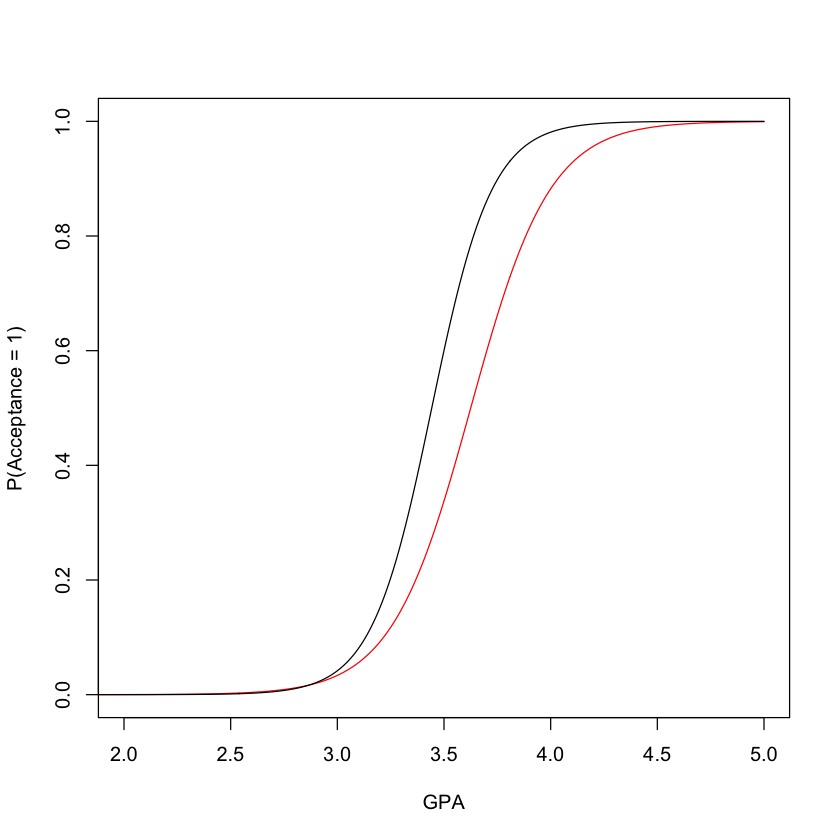

In [15]:
# Solution
# Create x values for plots of fitted models
xx <- seq(from = 0.0, to = 5.0, by = 0.01)  

# Create y values for fitted model for male students
male.yy <- predict(fit, newdata = data.frame(GPA = xx, Sex = 'M'), type = 'response')

# Create y values for fitted model for female students
female.yy <- predict(fit, newdata = data.frame(GPA = xx, Sex = 'F'), type = 'response')

# Create plots of fitted models, starting with an empty plot as a starting point
plot(NULL, xlim = c(2, 5), ylim = c(0, 1), xlab = 'GPA', ylab = 'P(Acceptance = 1)')
lines(xx, male.yy, col = 'red')
lines(xx, female.yy, col = 'black')

### c.

Estimate the odds ratio of acceptance for a unit increase in GPA for females.

In [16]:
# Solution
exp(7.083)

[1] 1191.538

### d.

Estimate the odds ratio of acceptance for unit increase in GPA for males.

In [17]:
# Solution
exp(5.374)

[1] 215.724

### e.

Answer the motivating question for this example. Justify your answer.

*Write your answer here. Double-click to edit.*

*Solution.* We fail to reject the null hypothesis of a $z$-test for the coefficient of $\mathit{GPA} \times \mathit{SexM}$, because the $p$-value = 0.6450 > 0.05 = $\alpha$. 

No, we do not see significant evidence that the slope of $\mathit{GPA}$ differs by sex.

### f.

Use the fitted model to estimate the probability of acceptance for a male with a 3.5 GPA.

In [18]:
# Solution
odds <- exp(-24.385 + 7.083*3.5 + 4.901*1 - 1.709*3.5*1)

odds / (1 + odds)

[1] 0.3373782

### g.

Should we drop both of the predictors that include sex?
Use a likelihood ratio test to compare the current model to the model with only GPA as a predictor.

In [19]:
# Solution
fit.GPA.only <- glm(Acceptance ~ GPA, data = MedGPA, family = binomial)
summary(fit.GPA.only)


Call:
glm(formula = Acceptance ~ GPA, family = binomial, data = MedGPA)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -19.207      5.629  -3.412 0.000644 ***
GPA            5.454      1.579   3.454 0.000553 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 56.839  on 53  degrees of freedom
AIC: 60.839

Number of Fisher Scoring iterations: 4


In [20]:
# Solution
G = 56.839 - 53.729
p.value <- 1 - pchisq(G, 2)

G
p.value

[1] 3.11

[1] 0.2111894

*Write your answer here. Double-click to edit.*

*Solution.* 

Nested LRT:

1. $H_0: \beta_2 = \beta_3 = 0$ (reduced model) vs. $H_A: \text{at least one ($\beta_2$ or $\beta_3$) $\ne 0$}$ (full model)
2. G = 3.11
3. $p$-value = 0.2112
4. $p$-value > $\alpha$, so fail to reject $H_0$. We have significant evidence that the reduced model is sufficient. 